# Programming Assignment - 4

# Classification with CNN

---

The aim of this assignment is to provide a warmup of how to find optimal hyperparameters for a given classification task.

You will perform a binary classification task of identifying whether an image contains a Burger or Vada pav.


---

## To do

1. Download the dataset from Kaggle at  https://www.kaggle.com/meemr5/vadapav
2. Download the pretrained ResNet50 model from the Keras or TorchVision library.


In [ ]:
!pip install patool
!pip install split-folders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 4.1 MB/s eta 0:00:00


In [ ]:
# Import the necessary libraries
import numpy as np
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image
import patoolib
import splitfolders
import tensorflow as tf
from keras.models import load_model
from PIL import ImageFile
import matplotlib.pyplot as plt
ImageFile.LOAD_TRUNCATED_IMAGES = True

# TO DO: Add any other libraries (if needed)

In [ ]:
#Modify the final fully connected layer to accomodate 2 classes (2 Points)

#Load the pretrained ResNet50 model excluding the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  #dense layer
predictions = Dense(1, activation='sigmoid')(x)  # Using sigmoid for 2 classes (Burger, Vadapav)


#freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

#Create the final model
model = Model(inputs=base_model.input, outputs=predictions)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Display the modified model architecture (2 Points)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,686,913 (97.99 MB)

 Trainable params: 2,099,201 (8.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

  The dataset has the following directory structure:
<pre>
<b>Root directory</b>
|__ <b>burger</b> : [all burger images]
|__ <b>vadapav</b>: [all vadapav images]
</pre>

  Modify the structure as

  <pre>
  <b>Root directory</b>
  |__ <b>train</b>
      |______ <b>burger</b>: [80% burger images]
      |______ <b>vadapav</b>: [80% vadapav images]
  |__ <b>validation</b>
      |______ <b>burger</b>: [10% burger images]
      |______ <b>vadapav</b>: [10% vadapav images]
  |__ <b>test</b>
      |______ <b>burger</b>: [10% burger images]
      |______ <b>vadapav</b>: [10% vadapav images]
  </pre>

In [ ]:
# Split the dataset: Train-Val-Test (3 Points)

#Function to check image integrity and remove corrupted images
def check_image_integrity(directory):
    corrupted_images = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            img_path = os.path.join(subdir, file)
            try:
                with Image.open(img_path) as img:
                    img.verify()  # Verify that it is an image
            except (IOError, SyntaxError) as e:
                print(f"Corrupted image found and removed: {img_path}")
                corrupted_images.append(img_path)
                os.remove(img_path)  # Remove corrupted image
    return corrupted_images

#Load and extract the dataset(dataset is in zip file)
patoolib.extract_archive("/content/archive.zip")
input_folder = '/content/VadaPav'
# input_folder = '/kaggle/input/VadaPav'
# out_folder = '/kaggle/working/VadaPav_split'


#Check image integrity
corrupted_images = check_image_integrity(input_folder)

#Split the dataset: Train-Val-Test
splitfolders.ratio(input_folder, output='VadaPav_split',
                   seed=42, ratio=(.8, .1, .1),
                   group_prefix=None)

INFO patool: Extracting /content/archive.zip ...
INFO:patool:Extracting /content/archive.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_kaqff60c -- /content/archive.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_kaqff60c -- /content/archive.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/archive.zip extracted to `VadaPav'.
INFO:patool:... /content/archive.zip extracted to `VadaPav'.
Copying files: 1161 files [00:02, 400.89 files/s]


In [ ]:
#Create Data Loaders / Generators for train, validation & test sets (3 Points)
#--- Mini Batches will be sampled from these. You can experiment to find an optimal batch size.

train_dir = "/content/VadaPav_split/train"
val_dir = "/content/VadaPav_split/val"
test_dir = "/content/VadaPav_split/test"

# train_dir = "/kaggle/working/VadaPav_split/train"
# val_dir = "/kaggle/working/VadaPav_split/val"
# test_dir = "/kaggle/working/VadaPav_split/test"

# Create Data Loaders / Generators for train, validation & test sets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Use a smaller batch size for stability
batch_size = 16

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,  #Shuffle data
    seed=42)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

Found 928 images belonging to 2 classes.
Found 115 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [ ]:
# Create an Adam Optimizer instance (Use variable learning rate) (2 Points)
lr = 0.00001
optimizer = Adam(learning_rate=lr)

In [ ]:
# Compile your model (Choose a suitable loss function for binary classification) (3 Points)
model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
#We have to change learning rate after training model for one learning rate so I defined function to reinitialize the model
def create_model():
    #Load and modify the ResNet50 model
    base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    #Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False
    model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
    return model

In [ ]:
# Perform grid search over a set of learning rates from  10^(−5)  till  10^(−1) (3 Points)
# -- Use step size of 0.1
# -- Find the optimal learning rate - maximum validation accuracy (2 Point)
# -- Plot a line graph to show the trend of training and validation set accuracies as a function of learning rate (2 Points)
# -- Save the model learned at the optimal learning rate (2 Points)

train_accuracies = []
val_accuracies = []
best_val_acc = 0
best_model = None
best_lr = None

learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1]

# Loop over each learning rate
for lr in learning_rates:
    print(f'Training with learning rate: {lr}')

    # Clear the previous model state
    tf.keras.backend.clear_session()

    # Reinitialize the model for each learning rate
    model = create_model()

    # optimizer.learning_rate.assign(lr)

    # Compile the model with the current learning rate
    model.compile(optimizer=Adam(learning_rate=lr),loss='binary_crossentropy',metrics=['accuracy'])

    # Train the model
    history = model.fit(train_generator,validation_data=val_generator,epochs=15,verbose=1)

    # Record the final training and validation accuracies
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)


    # Get the maximum validation accuracy
    val_acc = max(history.history['val_accuracy'])

    # Check if this is the best validation accuracy so far
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_lr = lr
        best_model = model

# Output the best learning rate and its validation accuracy
print(f'Best learning rate: {best_lr}, Validation Accuracy: {best_val_acc}')
# best_model.save('my_model.h5')

Training with learning rate: 1e-05
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 39s 419ms/step - accuracy: 0.4570 - loss: 0.7878 - val_accuracy: 0.5913 - val_loss: 0.6794
Epoch 2/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 219ms/step - accuracy: 0.5891 - loss: 0.6768 - val_accuracy: 0.5913 - val_loss: 0.6728
Epoch 3/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 229ms/step - accuracy: 0.6001 - loss: 0.6640 - val_accuracy: 0.5913 - val_loss: 0.6670
Epoch 4/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 236ms/step - accuracy: 0.6256 - loss: 0.6487 - val_accuracy: 0.6435 - val_loss: 0.6675
Epoch 5/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 229ms/step - accuracy: 0.5953 - loss: 0.6602 - val_accuracy: 0.6174 - val_loss: 0.6582
Epoch 6/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 264ms/step - accuracy: 0.6154 - loss: 0.6501 - val_accuracy: 0.6261 - val_loss: 0.6538
Epoch 7/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 234ms/step - accuracy: 0.6156 - loss: 0.6443 - val_accuracy: 0.6609 - val_loss: 0.6524
Epoch 8/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 239ms/step - accuracy: 0.6256 - loss: 0.6479 - val_accuracy: 0.591

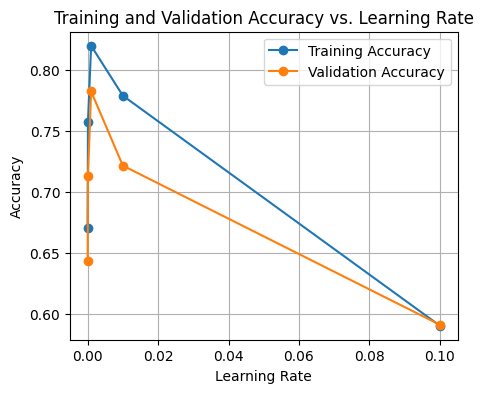

In [ ]:
plt.figure(figsize=(5, 4))
plt.plot(learning_rates, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(learning_rates, val_accuracies, marker='o', label='Validation Accuracy')

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Learning Rate')
plt.legend()

plt.grid(True)
plt.show()

In [ ]:
best_model.save('/content/best_model.keras')

In [ ]:
# Load the optimal model saved (2 Points)
# -- Determine and print its accuracy on the test set (2 Points)
# -- Compare the learned classifier with the random classifier (2 Points)

# Load the saved model
model1 = load_model('/content/best_model.keras')

# Evaluate the model
test_loss, test_acc = model1.evaluate(test_generator, steps=len(test_generator))
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')


8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 481ms/step - accuracy: 0.6207 - loss: 0.7671
Test Loss: 0.5201196670532227, Test Accuracy: 0.7711864113807678


In [ ]:
#Creating random model and testing test dataset on it for each learning rate

for lr in learning_rates:
    print(f'Testing random classifier with learning rate {lr} on testing dataset')

    #Clear the previous model state
    tf.keras.backend.clear_session()
    random_model = create_model()

    random_model.compile(optimizer=Adam(learning_rate=lr),loss='binary_crossentropy',metrics=['accuracy'])

    #Evaluate the model
    test_loss, test_acc = random_model.evaluate(test_generator, steps=len(test_generator))
    print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')

Testing random classifier with learning rate 1e-05 on testing dataset
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 436ms/step - accuracy: 0.6769 - loss: 0.6500
Test Loss: 0.7470110654830933, Test Accuracy: 0.4067796468734741
Testing random classifier with learning rate 0.0001 on testing dataset
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 296ms/step - accuracy: 0.6769 - loss: 0.6501
Test Loss: 0.7608951926231384, Test Accuracy: 0.4067796468734741
Testing random classifier with learning rate 0.001 on testing dataset
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 305ms/step - accuracy: 0.3348 - loss: 0.7019
Test Loss: 0.6859651207923889, Test Accuracy: 0.5847457647323608
Testing random classifier with learning rate 0.01 on testing dataset
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step - accuracy: 0.3231 - loss: 0.8819
Test Loss: 0.690685510635376, Test Accuracy: 0.5932203531265259
Testing random classifier with learning rate 0.1 on testing dataset
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 296ms/step - accuracy: 0.3231 - loss: 0.7680
Test Loss: 0.687357366085052